In [1]:
# Import all the necessary libraries.
import random
import matplotlib.pyplot as plt
import math
import numpy as np
import functools
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython.core.display import display, HTML
import math 



np.random.seed(32)

"""
Generate data points for plotting the error surface.
"""
def calculateErrorSurface(y, x):
    # Generate values for parameter space.
    N = 200
    a0 = np.linspace(-10.0, 14.0, N)
    a1 = np.linspace(-10.0, 14.0, N)
    a2 = np.linspace(-10.0, 14.0, N)

    A0, A1, A2 = np.meshgrid(a0, a1, a2)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((N,N))
    for iter1 in range(0, N):
        for iter2 in range(0, N):
            yhat = A0[iter1][iter2] + A1[iter1][iter2]*x + A2[iter1][iter2]*x**2
            J[iter1][iter2] = (1/M)*np.sum( np.square(y - yhat)  )
            
    return J, A0, A1, A2
            
"""
Calculate closed-form solution using the normal equation.
"""
def calculateClosedFormSolution(X, x):
    # Closed-form solution.
    a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    yhat = a_opt[0, 0] + a_opt[1, 0]*x + a_opt[2, 0]*x**2
    Joptimum = (1/M)*np.sum(np.power((y - yhat), 2) )
    
    return Joptimum, a_opt

"""
Batch gradient descent solution.
"""
def batchGradientDescent(alpha, n_iterations, X_b, y):
    # Random initialization of parameters.
    a = np.zeros((3,1))
    a[0] = -10;
    a[1] = -10;
    a[2] = -10;

    # Create vector for parameter history.
    a_hist = np.zeros((3, n_iterations+1))

    # Batch gradient-descent loop.
    for iteration in range(n_iterations):
        gradients = -2/M * X_b.T.dot(y - X_b.dot(a))
        a = a - alpha * gradients
        Jgd[iteration+1] = (1/M)*sum(np.power( (y - X.dot(a)) , 2))
        
    return a, a_hist, Jgd

"""
Hypothesis Function
"""
def h(X_b, a):
    return a.T.dot(X_b.T)
    
## --------------------------------------------------------   
    
# Number of examples.
M = 1000

# Generate target function.
x = np.random.uniform(-5, 5, (M, 1))

w = np.random.normal(0, math.sqrt(10),(M, 1))
y = 2.0 + 1.5*x + 2.3 * x**2 + w

X = np.c_[np.ones((M, 1)), x, x**2]
X_b = X


n_iterations = 1000
a = np.zeros((3,1))


Jgd = np.zeros(n_iterations+1)

Jgd[0] = (1/M)*sum(np.power(y - X.dot(a), 2))

# Batch gradient descent solution.
alpha = 0.008  # learning rate

In [2]:
# Calculate data point for plotting error surface.
J, A0, A1, A2 = calculateErrorSurface(y, x)

In [3]:
# Calculate closed-form solution.
Joptimum, a_opt = calculateClosedFormSolution(X_b, x)

In [4]:
# Run batch gradient-descent algorithm.
a, a_hist, Jgd = batchGradientDescent(alpha, n_iterations, X_b, y)

In [5]:
# Print found values.
print('a0_opt: ' + str(a_opt[0, 0]))
print('a1_opt: ' + str(a_opt[1, 0]))
print('a2_opt: ' + str(a_opt[2, 0]))
print()
print('a0_sgd: ' + str(a[0, 0]))
print('a1_sgd: ' + str(a[1, 0]))
print('a2_sgd: ' + str(a[2, 0]))

a0_opt: 1.8084420426721763
a1_opt: 1.5084279653839041
a2_opt: 2.299314107517648

a0_sgd: 1.7998031520757385
a1_sgd: 1.50842472410169
a2_sgd: 2.2998985915953374


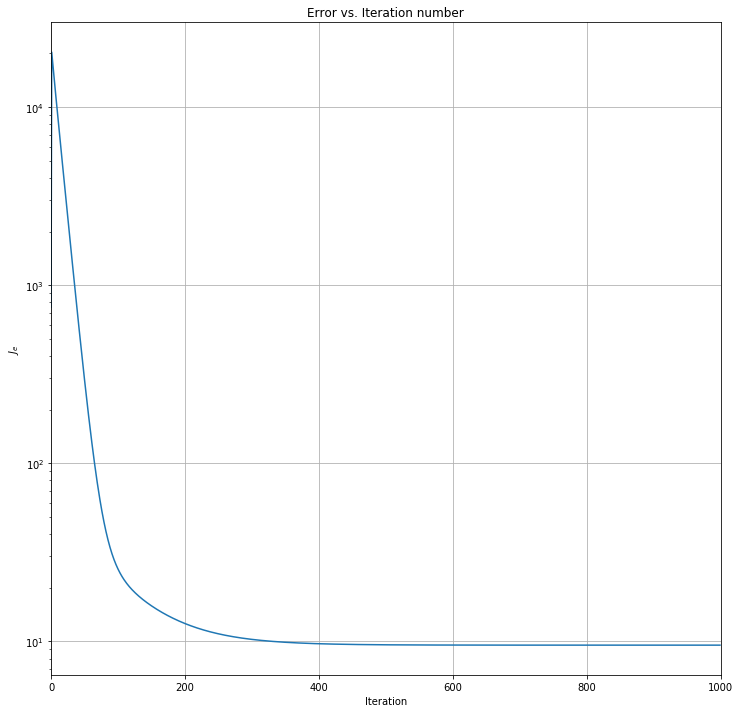

In [6]:
fig = plt.figure(figsize=(12,12))
plt.plot(np.arange(0, n_iterations), Jgd[0:n_iterations])
plt.xlim((0, n_iterations))
plt.yscale('log')
plt.grid(b=True)
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()